Data Set:
ABC company is a NBFC & deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.
ABC wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

Data Dictionary:

Train file: CSV containing the customers for whom loan eligibility is known as 'Loan_Status'

Variable Description:
Loan_ID Unique Loan ID
Gender Male/ Female
Married Applicant married (Y/N)
Dependents Number of dependents
Education Applicant Education (Graduate/ Under Graduate)
Self_Employed Self employed (Y/N)
ApplicantIncome Applicant income
CoapplicantIncome Coapplicant income
LoanAmount Loan amount in thousands
Loan_Amount_Term Term of loan in months
Credit_History credit history meets guidelines
Property_Area Urban/ Semi Urban/ Rural
Loan_Status (Target) Loan approved (Y/N)

Validation file: CSV containing the customer information for whom loan eligibility is to be predicted

Variable Description
Loan_ID Unique Loan ID
Gender Male/ Female
Married Applicant married (Y/N)
Dependents Number of dependents
Education Applicant Education (Graduate/ Under Graduate)
Self_Employed Self employed (Y/N)
ApplicantIncome Applicant income
CoapplicantIncome Coapplicant income
LoanAmount Loan amount in thousands
Loan_Amount_Term Term of loan in months
Credit_History credit history meets guidelines
Property_Area Urban/ Semi Urban/ Rural


Submission file format:
Variable Description
Loan_ID Unique Loan ID
Loan_Status (Target) Loan approved (Y/N)

Task:
Design a model that will be able to predict if a customer should be eligible for loan or not.

Deliverables:
Provide the following:
• The source code you used to build the model and make predictions. (You are
free to use any language and any open-source package/library)
• A .csv file containing the predictions of the validation data. You can add the target
column (‘Loan_Status) to the validation data or simply provide it alone with the Loan_ID
column.
• Briefly answer the following questions:
o Describe your model and why did you choose this model over other
types of models?
o Describe any other models you have tried and why do you think this
model performs better?
o How did you handle missing data?
o How did you handle categorical (string) data?
o How did you handle unbalanced data?
How did you test your model ?

# Importing Libraries

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Defining class and functions

In [2]:
class Loan:
    def __init__(self, x, y,ml):
        self.x = x
        self.y = y
        self.x_train = None 
        self.x_test = None 
        self.y_train = None 
        self.y_test = None
        self.ml=ml

    def split(self):
        x_train, x_test, y_train, y_test = train_test_split(self.x, self.y, train_size=0.8,random_state=80)
        self.x_train = x_train
        self.x_test = x_test 
        self.y_train = y_train 
        self.y_test = y_test 
        self.ml.fit(x_train, y_train)

    def mscore(self):
        print('Training Score:', self.ml.score(self.x_train, self.y_train))
        print('Testing Score:', self.ml.score(self.x_test, self.y_test))

    def met(self):
        y_pred = self.ml.predict(self.x_test)
        sns.heatmap(confusion_matrix(self.y_test,y_pred),annot=True)
        

# Reading the data

In [3]:
df=pd.read_csv(r"C:\Users\aarza\Desktop\Dataset\imarticus\basant ml\train (1).csv")

In [4]:
df.head() #DATA

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002051,Male,Yes,0,Graduate,No,2400,2167.0,115.0,360.0,1.0,Semiurban,Y
1,LP002255,Male,No,3+,Graduate,No,9167,0.0,185.0,360.0,1.0,Rural,Y
2,LP002877,Male,Yes,1,Graduate,No,1782,2232.0,107.0,360.0,1.0,Rural,Y
3,LP002931,Male,Yes,2,Graduate,Yes,6000,0.0,205.0,240.0,1.0,Semiurban,N
4,LP002743,Female,No,0,Graduate,No,2138,0.0,99.0,360.0,0.0,Semiurban,N


In [5]:
df.info() #trying to get information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            491 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            488 non-null    object 
 3   Dependents         478 non-null    object 
 4   Education          491 non-null    object 
 5   Self_Employed      463 non-null    object 
 6   ApplicantIncome    491 non-null    int64  
 7   CoapplicantIncome  491 non-null    float64
 8   LoanAmount         474 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     447 non-null    float64
 11  Property_Area      491 non-null    object 
 12  Loan_Status        491 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 50.0+ KB


In [6]:
df.isnull().sum() # checking null values

Loan_ID               0
Gender               11
Married               3
Dependents           13
Education             0
Self_Employed        28
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           17
Loan_Amount_Term     11
Credit_History       44
Property_Area         0
Loan_Status           0
dtype: int64

# Removing Null Values

In [7]:
def fillcate(df):
    for i in df.columns:
        if df[i].dtype == 'O':
            # Calculate the mode (most frequent category) of the column
            mode_value = df[i].mode().iloc[0]
            # Fill NA values with the mode value
            df[i].fillna(mode_value, inplace=True)

In [8]:
fillcate(df)

In [9]:
df['LoanAmount'].mean()

146.68987341772151

<Axes: >

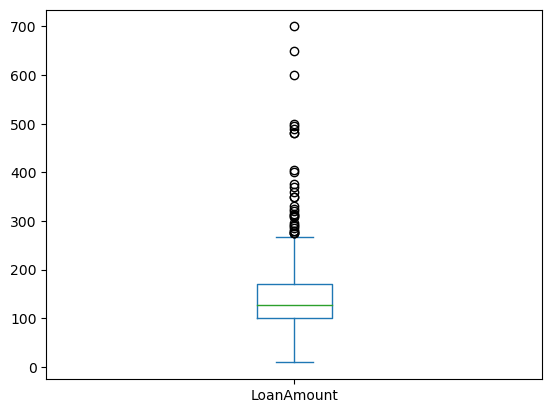

In [10]:
df['LoanAmount'].plot(kind='box')

In [11]:
df['LoanAmount'].median()

128.0

In [12]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

In [13]:
df['Loan_Amount_Term'].value_counts()

360.0    408
180.0     35
480.0     13
300.0     10
240.0      4
84.0       3
120.0      3
36.0       2
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

In [14]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [15]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [16]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Splitting independent and target variable

In [17]:
x=df.drop(['Loan_ID','Loan_Status'],axis=1)

In [18]:
y=df['Loan_Status'].apply(lambda x : 1 if x=='Y' else 0 ) #Loan Status is our target variable

In [19]:
y

0      1
1      1
2      1
3      0
4      0
      ..
486    1
487    1
488    1
489    1
490    1
Name: Loan_Status, Length: 491, dtype: int64

In [20]:
cat=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

In [21]:
dummy=pd.get_dummies(x[cat],drop_first=True)#converting categorical value into dummies

In [22]:
x = pd.concat([x,dummy], axis=1)

In [23]:
x.drop(columns=cat, inplace=True)

In [24]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,2400,2167.0,115.0,360.0,1.0,1,1,0,0,0,0,0,1,0
1,9167,0.0,185.0,360.0,1.0,1,0,0,0,1,0,0,0,0
2,1782,2232.0,107.0,360.0,1.0,1,1,1,0,0,0,0,0,0
3,6000,0.0,205.0,240.0,1.0,1,1,0,1,0,0,1,1,0
4,2138,0.0,99.0,360.0,0.0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,3182,2917.0,161.0,360.0,1.0,1,0,0,0,0,0,0,0,1
487,4865,5624.0,208.0,360.0,1.0,1,1,0,1,0,0,0,1,0
488,3617,0.0,107.0,360.0,1.0,1,0,0,1,0,0,0,1,0
489,8333,3750.0,187.0,360.0,1.0,1,0,0,0,0,0,0,0,0


# Logistic Regression

In [25]:
# Create an instance of the Laptop class
logit = Loan(x,y,LogisticRegression())  # Replace x and y with your actual data and model

In [26]:
# Call the split method
logit.split() 

In [27]:
# Call the mscore method
logit.mscore()  


Training Score: 0.7806122448979592
Testing Score: 0.898989898989899


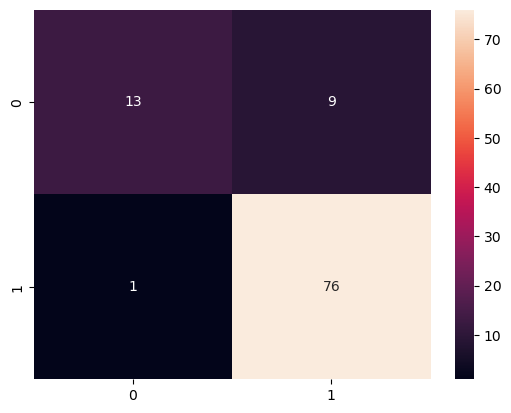

In [28]:
# Call the met method
logit.met() 

# Scaling Price column Using Robust Scaler

In [29]:
from sklearn.preprocessing import RobustScaler
colm=x.columns

In [30]:
scaler = RobustScaler()

# Fit and transform the DataFrame 'x' using the scaler
scaled_values = scaler.fit_transform(x)

# Create a new DataFrame with the scaled values and original column names
x_scaled = pd.DataFrame(scaled_values, columns=colm)

In [31]:
x_scaled

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,-0.465185,0.423341,-0.204724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.762634,-0.538274,0.897638,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.668642,0.452185,-0.330709,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.720000,-0.538274,1.212598,-120.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,-0.551440,-0.538274,-0.456693,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,-0.207737,0.756157,0.519685,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
487,0.346337,1.957400,1.259843,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
488,-0.064527,-0.538274,-0.330709,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
489,1.488066,1.125804,0.929134,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Logistic Regression 

Training Score: 0.7857142857142857
Testing Score: 0.898989898989899


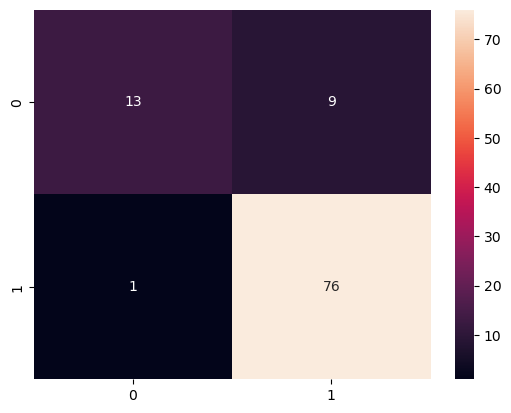

In [32]:
# Create an instance of the Laptop class
logit_rs= Loan(x_scaled,y,LogisticRegression())  

# Call the split method
logit_rs.split()  

# Call the mscore method
logit_rs.mscore()

# Call the met method
logit_rs.met() 


As the report indicate a lower error rate but accuracy score is lower in testing data set as compare to training data set which indicate *OVERFITTING*

# Lasso Regression

Training Score: 0.7831632653061225
Testing Score: 0.898989898989899


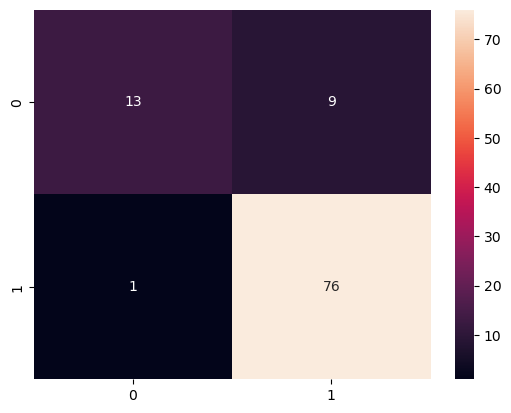

In [33]:

logit_rs_lasso= Loan(x_scaled,y,LogisticRegression(penalty='l1', solver='liblinear'))  

# Call the split method
logit_rs_lasso.split()  

# Call the mscore method
logit_rs_lasso.mscore()

# Call the met method
logit_rs_lasso.met() 


# ridge Regression

Training Score: 0.7857142857142857
Testing Score: 0.898989898989899


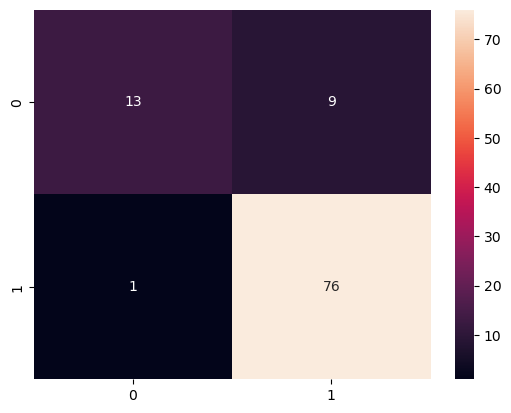

In [34]:
logit_rs_ridge= Loan(x_scaled,y,LogisticRegression(penalty='l2'))  

# Call the split method
logit_rs_ridge.split()  

# Call the mscore method
logit_rs_ridge.mscore()

# Call the met method
logit_rs_ridge.met() 


# Decision tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dt=Loan(x,y,DecisionTreeClassifier())

Training Score: 1.0
Testing Score: 0.7070707070707071


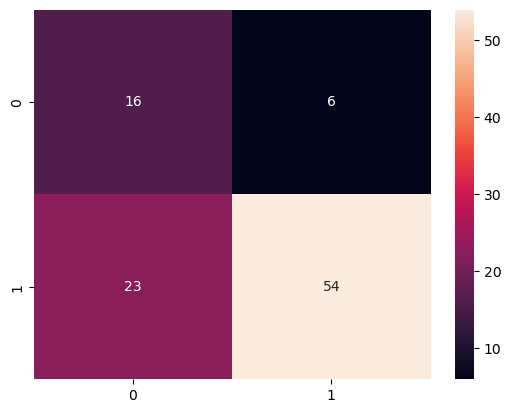

In [37]:
# Call the split method
dt.split() 

# Call the mscore method
dt.mscore()  

# Call the met method
dt.met()  

# Random forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf=Loan(x,y,RandomForestClassifier())

Training Score: 1.0
Testing Score: 0.8181818181818182


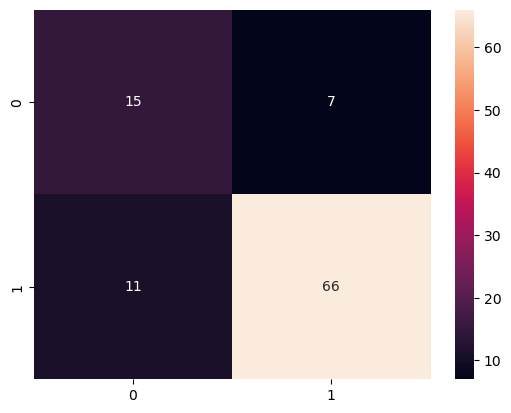

In [40]:
# Call the split method
rf.split() 

# Call the mscore method
rf.mscore()  

# Call the met method
rf.met()  

# Boosting

### AdaBoost

In [41]:
from sklearn.ensemble import AdaBoostClassifier

In [42]:
ab=Loan(x,y,AdaBoostClassifier())

Training Score: 0.8316326530612245
Testing Score: 0.8080808080808081


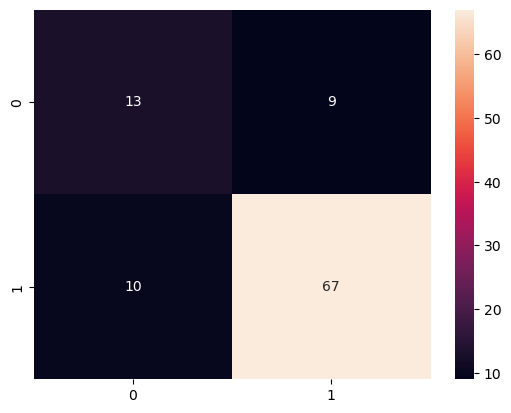

In [43]:
# Call the split method
ab.split() 

# Call the mscore method
ab.mscore()  

# Call the met method
ab.met()  

### Gradient Boosting

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
gb=Loan(x,y,GradientBoostingClassifier())

Training Score: 0.8979591836734694
Testing Score: 0.797979797979798


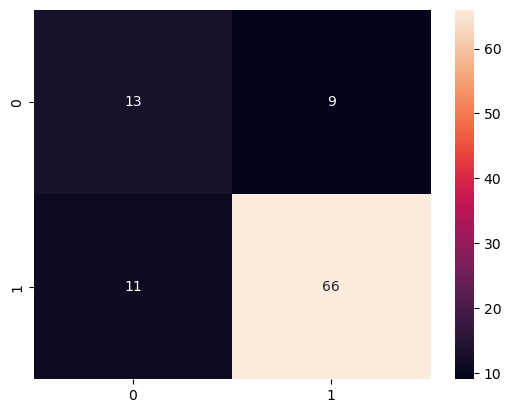

In [46]:
# Call the split method
gb.split() 

# Call the mscore method
gb.mscore()  

# Call the met method
gb.met()  

### XG Boosting

In [47]:
from xgboost import XGBClassifier

In [48]:
xgb=Loan(x,y,XGBClassifier())

Training Score: 1.0
Testing Score: 0.7676767676767676


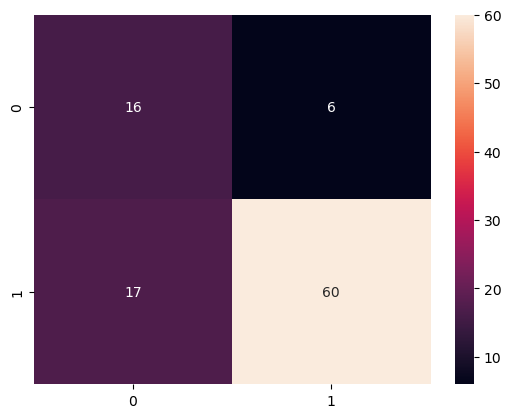

In [49]:
# Call the split method
xgb.split() 

# Call the mscore method
xgb.mscore()  

# Call the met method
xgb.met()  